<h4>Explore how weather affects GDP in Industrial based economies</h4>

In [1]:
#import dependencies
import requests 
import json
from pprint import pprint
import os
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress


In [2]:
# Read in Weather Data
file_path = os.path.join("Resources", "Merge_data_2005-2015.csv")
merge_df = pd.read_csv(file_path)
merge_df.head(100)

,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP,GDP_md,GDP_bd
0,0,AFG,Afghanistan,2005,56.087945,29.609967,6.209138e+09,6.209138e+03,6.209138
1,1,AFG,Afghanistan,2006,57.501470,27.120458,6.971286e+09,6.971286e+03,6.971286
2,2,AFG,Afghanistan,2007,56.320054,25.329681,9.747880e+09,9.747880e+03,9.747880
3,3,AFG,Afghanistan,2008,56.755070,21.505365,1.010923e+10,1.010923e+04,10.109226
4,4,AFG,Afghanistan,2009,56.807912,31.106477,1.243909e+10,1.243909e+04,12.439087
...,...,...,...,...,...,...,...,...,...
95,95,AUS,Australia,2012,70.971935,38.947468,1.546150e+12,1.546150e+06,1546.150000
96,96,AUS,Australia,2013,72.790715,35.282917,1.576180e+12,1.576180e+06,1576.180000
97,97,AUS,Australia,2014,72.455600,37.217767,1.467480e+12,1.467480e+06,1467.480000
98,98,AUS,Australia,2015,72.133145,36.870951,1.351690e+12,1.351690e+06,1351.690000


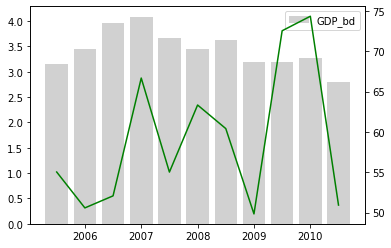

In [3]:
AFG_df = merge_df.loc[merge_df['ISO3'] == 'AND']
AFG_df
       
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(AFG_df['Year'], AFG_df["GDP_bd"], color=(190/255,190/255,190/255,0.7), label='GDP_bd')
ax2.plot(AFG_df['Year'], AFG_df["Rainfall_mm"], color='green', label='Rainfall_mm')
ax.set_xticklabels(AFG_df['Year'])
ax.legend(loc='best')

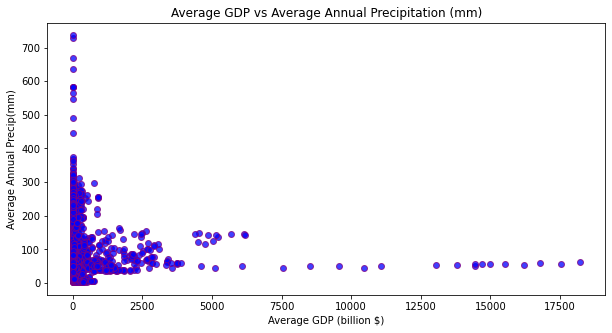

In [8]:
# # Make Scatter plot of Rainfall vs GDP  
plt.figure(figsize=(10,5))
plt.scatter(merge_df["GDP_bd"], merge_df["Rainfall_mm"], marker='o', facecolor='b', edgecolors='purple', alpha = 0.75)
plt.title(f"Average GDP vs Average Annual Precipitation (mm)")
plt.xlabel("Average GDP (billion $)")
plt.ylabel("Average Annual Precip(mm)")
plt.show()    

In [5]:
#Find min and max values

max = merge_df["Rainfall_mm"].max()
min = merge_df["Rainfall_mm"].min()
print(f"The maximum value for Precipitation is {max}.")
print(f"The minimum value for Precipitation is {min}.")

The maximum value for Precipitation is 736.4781750000002.
The minimum value for Precipitation is 1.6598875000000002.


In [6]:
#take a look at where the most countries appear and where the countries 
#with the highest GDP are.
zoom_df = merge_df.loc[(merge_df["Rainfall_mm"] <= 60)
                      &(merge_df["Rainfall_mm"] > 0)]
zoom_df

,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP,GDP_md,GDP_bd
0,0,AFG,Afghanistan,2005,56.087945,29.609967,6.209138e+09,6209.137625,6.209138
1,1,AFG,Afghanistan,2006,57.501470,27.120458,6.971286e+09,6971.285595,6.971286
2,2,AFG,Afghanistan,2007,56.320054,25.329681,9.747880e+09,9747.879532,9.747880
3,3,AFG,Afghanistan,2008,56.755070,21.505365,1.010923e+10,10109.225814,10.109226
4,4,AFG,Afghanistan,2009,56.807912,31.106477,1.243909e+10,12439.087077,12.439087
...,...,...,...,...,...,...,...,...,...
2062,2139,ZWE,Zimbabwe,2010,72.355040,57.353223,1.204166e+10,12041.655200,12.041655
2064,2141,ZWE,Zimbabwe,2012,71.438135,45.312368,1.711485e+10,17114.849900,17.114850
2065,2142,ZWE,Zimbabwe,2013,70.923830,51.234424,1.909102e+10,19091.020000,19.091020
2066,2143,ZWE,Zimbabwe,2014,71.078870,50.608135,1.949552e+10,19495.519600,19.495520


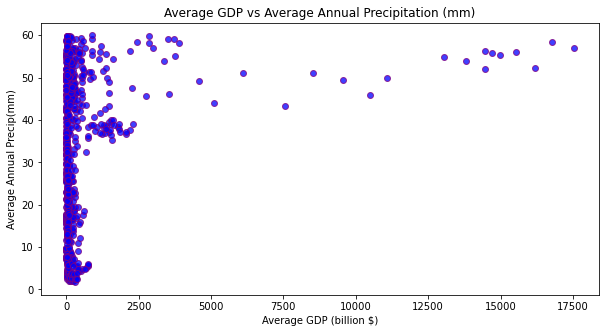

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(zoom_df["GDP_bd"], zoom_df["Rainfall_mm"], marker='o', facecolor='b', edgecolors='purple', alpha = 0.75)
plt.title(f"Average GDP vs Average Annual Precipitation (mm)")
plt.xlabel("Average GDP (billion $)")
plt.ylabel("Average Annual Precip(mm)")
plt.show()  

In [174]:
9#Make Scatter Plot of Countries by binning GDPs
avg_gdp = zoom_df.groupby('ISO3')["GDP_bd"].mean()
avg_rain = zoom_df.groupby('ISO3')["Rainfall_mm"].mean()

avg_data ={"GDP_bd": avg_gdp,"Rainfall_mm": avg_rain}
avg_df = pd.DataFrame(avg_data)
avg_df = avg_df.reset_index()
avg_df

,ISO3,GDP_bd,Rainfall_mm
0,AFG,14.553832,27.501888
1,ALB,12.890765,59.838025
2,AND,3.370339,52.248547
3,ARE,308.736000,4.278243
4,ARG,416.929545,45.973859
...,...,...,...
78,USA,15150.300000,55.193379
79,UZB,46.501503,16.872758
80,YEM,29.921127,14.138222
81,ZAF,330.453545,37.898470


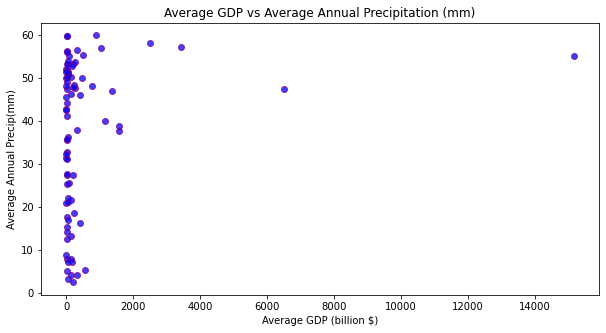

In [175]:
plt.figure(figsize=(10,5))
plt.scatter(avg_df["GDP_bd"], avg_df["Rainfall_mm"], marker='o', facecolor='b', edgecolors='purple', alpha = 0.75)
plt.title(f"Average GDP vs Average Annual Precipitation (mm)")
plt.xlabel("Average GDP (billion $)")
plt.ylabel("Average Annual Precip(mm)")
plt.show()  

In [184]:
# gdp_bins = [0, 99, 999, 9999, 99999]
# gdp_naming = ["<100","100-999","1000-9999","10000+"]

# bin_df["GDP Binning"] = pd.cut(bin_df['GDP_bd'],gdp_bins, labels = gdp_naming)
# bin_df

zoomgdp_df1 = avg_df.loc[(avg_df["GDP_bd"] <= 99.9)
                      &(avg_df["GDP_bd"] > 0)]
zoomgdp_df2 = avg_df.loc[(avg_df["GDP_bd"] <= 999.9)
                      &(avg_df["GDP_bd"] > 100)]
zoomgdp_df3 = avg_df.loc[(avg_df["GDP_bd"] <= 9999.9)
                      &(avg_df["GDP_bd"] > 1000)]
zoomgdp_df4 = avg_df.loc[(avg_df["GDP_bd"] > 10000)]

zoomgdp_df4


,ISO3,GDP_bd,Rainfall_mm
78,USA,15150.3,55.193379


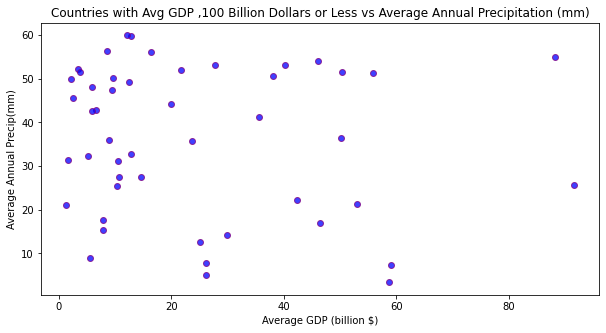

(-0.12645885426467263, 0.39173014917707183)

In [190]:
#Scatter Plots for Countries with GDP ,100 Billion Dollars or Less
plt.figure(figsize=(10,5))
plt.scatter(zoomgdp_df1["GDP_bd"], zoomgdp_df1["Rainfall_mm"], marker='o', facecolor='b', edgecolors='purple', alpha = 0.75)
plt.title(f"Countries with Avg GDP ,100 Billion Dollars or Less vs Average Annual Precipitation (mm)")
plt.xlabel("Average GDP (billion $)")
plt.ylabel("Average Annual Precip(mm)")
plt.show()
corr=sts.pearsonr(zoomgdp_df1["Rainfall_mm"],zoomgdp_df1["GDP_bd"]);
corr

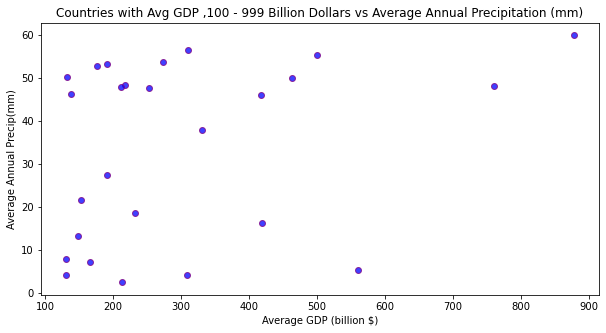

(0.30000326089812673, 0.13647836176179695)

In [191]:
#Scatter Plots for Countries with GDP ,100 Billion Dollars or Less
plt.figure(figsize=(10,5))
plt.scatter(zoomgdp_df2["GDP_bd"], zoomgdp_df2["Rainfall_mm"], marker='o', facecolor='b', edgecolors='purple', alpha = 0.75)
plt.title(f"Countries with Avg GDP ,100 - 999 Billion Dollars vs Average Annual Precipitation (mm)")
plt.xlabel("Average GDP (billion $)")
plt.ylabel("Average Annual Precip(mm)")
plt.show()  
corr=sts.pearsonr(zoomgdp_df2["Rainfall_mm"],zoomgdp_df2["GDP_bd"]);
corr

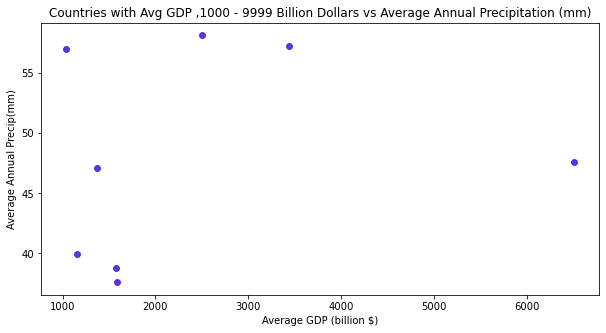

(0.2107652692931008, 0.6163624234651828)

In [192]:
#Scatter Plots for Countries with GDP ,100 Billion Dollars or Less
plt.figure(figsize=(10,5))
plt.scatter(zoomgdp_df3["GDP_bd"], zoomgdp_df3["Rainfall_mm"], marker='o', facecolor='b', edgecolors='purple', alpha = 0.75)
plt.title(f"Countries with Avg GDP ,1000 - 9999 Billion Dollars vs Average Annual Precipitation (mm)")
plt.xlabel("Average GDP (billion $)")
plt.ylabel("Average Annual Precip(mm)")
plt.show() 
corr=sts.pearsonr(zoomgdp_df3["Rainfall_mm"],zoomgdp_df3["GDP_bd"]);
corr

In [28]:
# # # Make Scatter plots

# ListofISO34Plot = merge_df['ISO3']
# for ISO in ListofISO34Plot:
#     TemporaryScatterPlot_df = merge_df.loc[merge_df['ISO3']== ISO]
#     RainfallCorrList = []
#     RainfallCorrDict = {}

#     GDP = TemporaryScatterPlot_df['GDP']
#     Rainfall = TemporaryScatterPlot_df['Rainfall_mm']
#     Yrs = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
    
#     plt.figure(figsize=(10,5))
#     plt.scatter(x=GDP, y=Rainfall, marker='o', facecolor='b', edgecolors='purple', alpha = 0.75)
#     plt.title(f"Average GDP vs Average Annual Rainfall (mm) for {ISO}")
#     plt.xlabel("Average GDP ($)")
#     plt.ylabel("Average Annual Rainfall (mm))")
    
#     # dataframe from scatter plot
#     TemporaryScatterPlot_df

#     # CORRELATION COEFFICIENT
#     GDP = TemporaryScatterPlot_df['GDP']
#     Rainfall = TemporaryScatterPlot_df['Rainfall_mm']
#     Rainfall_correlation = sts.pearsonr(GDP, Rainfall)
#     Rainfall_correlation = [Rainfall_correlation]        

#     # print(f"The correlation coefficient (r) is {round(Temp_correlation[0],4)}")
#     # print(f"The p-value is {round(Temp_correlation[1],11)}")

#     #  LINEAR REGRESSION MODEL 
#     # Run the regression and store each of the returned values
#     slope, intercept, rvalue, pvalue, stderr = linregress(GDP, Rainfall)
#     Rainfall_regression = [slope, intercept, rvalue, pvalue, stderr]

#     # Calculate the predictions for each value of x (# Rooms)
#     regression_values = GDP * slope + intercept

#     # store a string version of the linear equation, so we can display it on the plot
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#     RainfallCorrList = Rainfall_correlation
#     RainfallCorrList.append(Rainfall_regression)
#     RainfallCorrDict[ISO] = RainfallCorrList
#     RainfallCorrDict

In [ ]:
# TemporaryScatterPlot_df = merge_df.loc[merge_df['ISO3']== 'USA']
# TempCorrList = []
# TempCorrDict = {}

# GDP = TemporaryScatterPlot_df['GDP']
# Rainfall = TemporaryScatterPlot_df['Rainfall_mm']
# Yrs = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

# plt.scatter(x=GDP, y=Ranfall, marker='o', facecolor='b', edgecolors='purple', alpha = 0.75)
# plt.title(f"Average GDP vs Average Annual Rainfall (mm) for {'USA'}")
# plt.xlabel("Average GDP ($)")
# plt.ylabel("Average Annual Rainfall (mm)")

# # dataframe from scatter plot
# TemporaryScatterPlot_df

# # CORRELATION COEFFICIENT
# GDP = TemporaryScatterPlot_df['GDP']
# Rainfall = TemporaryScatterPlot_df['Rainfall_mm']
# Rainfall_correlation = sts.pearsonr(GDP, Rainfall)
# Rainfall_correlation = [Rainfal_correlation]        

# # print(f"The correlation coefficient (r) is {round(Temp_correlation[0],4)}")
# # print(f"The p-value is {round(Temp_correlation[1],11)}")

# #  LINEAR REGRESSION MODEL 
# # Run the regression and store each of the returned values
# slope, intercept, rvalue, pvalue, stderr = linregress(GDP, Rainfall)
# Temp_regression = [slope, intercept, rvalue, pvalue, stderr]

# # Calculate the predictions for each value of x (# Rooms)
# regression_values = GDP * slope + intercept

# # store a string version of the linear equation, so we can display it on the plot
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# RainfallCorrList = Rainfall_correlation
# RainfallCorrList.append(Rainfall_regression)
# RainfallCorrDict['USA'] = RainfallCorrList
# RainfallCorrDict